In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


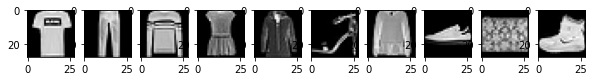

In [ ]:
plt.figure(figsize=(10,4))
classes=[]
for k in np.arange(0,10):
  ind= np.where(train_labels==k)
  classes.append(ind[0][0])
for index in np.arange(len(classes)):
  plt.subplot(1,10,index+1)
  plt.imshow(train_images[classes[index]].squeeze(),cmap=plt.cm.gray)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=10)
train_images=train_images[0:10000]
train_labels=train_labels[0:10000]
test_images=test_images[0:1000]
test_labels=test_labels[0:1000]
%time knc.fit(train_images.reshape(10000,784),train_labels)

%time score=knc.score(test_images.reshape(1000,784),test_labels[0:1000])


CPU times: user 984 ms, sys: 36.8 ms, total: 1.02 s
Wall time: 1.03 s
CPU times: user 18.8 s, sys: 3.67 ms, total: 18.8 s
Wall time: 18.9 s


In [ ]:
print("Score for K-nearest neighbour is",score*100,"%")

Score for Kn is 83.1 %


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_images=sc.fit_transform(train_images.reshape(10000,784))
test_images = sc.fit_transform(test_images.reshape(1000,784))
log_reg=LogisticRegression(solver='saga',max_iter=1000, tol=0.01, C=0.1)
%time log_reg.fit(train_images,train_labels)
%time score=log_reg.score(test_images,test_labels[0:1000])


CPU times: user 16.9 s, sys: 0 ns, total: 16.9 s
Wall time: 17 s
CPU times: user 2.81 ms, sys: 3.84 ms, total: 6.65 ms
Wall time: 3.98 ms
Score for Logistic Regression is 84.1 %


In [ ]:
print("Score for Logistic Regression is",score*100,"%")

Score for Logistic Regression is 84.1 %


In [ ]:
from sklearn import svm
svc = svm.SVC(probability=False,kernel="linear",C=0.5,gamma='auto',tol=0.01)
%time svc.fit(train_images,train_labels)
%time scsvm=svc.score(test_images,test_labels[0:1000])

CPU times: user 27.8 s, sys: 6.9 ms, total: 27.8 s
Wall time: 27.9 s
CPU times: user 4.75 s, sys: 1 µs, total: 4.75 s
Wall time: 4.77 s


In [ ]:
print("Score for Linear kernel -svm is",scsvm*100,"%")

Score for Linear kernel -svm is 81.6 %


In [ ]:
svc = svm.SVC(probability=False,kernel="rbf",C=0.5,gamma='auto',tol=0.001)
%time svc.fit(train_images,train_labels)
%time scrb=svc.score(test_images,test_labels[0:1000])

CPU times: user 44.7 s, sys: 8.75 ms, total: 44.7 s
Wall time: 44.9 s
CPU times: user 7.21 s, sys: 0 ns, total: 7.21 s
Wall time: 7.24 s


In [ ]:
print("Score for svm rbf kernel is",scrb*100,"%")

Score for svm rbf kernel is 85.0 %


In [ ]:
import pandas as pd

table={'KNN':{'Train Time': '1.03 s', 'Pred Time':'18.9 s', 'Accuracy':'83.1%'}}
table['Logistic Regression']={'Train Time': '17 s', 'Pred Time':'3.98 ms', 'Accuracy':'84%'}
table['SVM-Linear']={'Train Time': '27.9 s', 'Pred Time':'4.77 s', 'Accuracy':'81.6%'}
table['SVM-rbf']={'Train Time': '44.9 s', 'Pred Time':'7.24 s', 'Accuracy':'85%'}
pd.DataFrame(table)

,KNN,Logistic Regression,SVM-Linear,SVM-rbf
Train Time,1.03 s,17 s,27.9 s,44.9 s
Pred Time,18.9 s,3.98 ms,4.77 s,7.24 s
Accuracy,83.1%,84%,81.6%,85%


In [ ]:
print("The differences in accuracy are minimal, but in terms of training time, KNN is the least, but the prediction time for logistic regression is the least")

The differences in accuracy are minimal, but in terms of training time, KNN is the least, but the prediction time for logistic regression is the least
